In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import uproot as up


/hpc/applications/anaconda/3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [7]:

branch_names=['lep_Pt_0','lep_Pt_1','lep_Pt_2',
              'Ptll01',
              'met_met','Mll01','Mll12','best_Z_Mll',
              'DRll01','DRll02','DRll12',
              'HT','HT_lep',
              'DRl2j0','DRl2j1',
              'mj0j1','ml0j0','ml0j1','ml2j0','ml2j1']

events = up.open("ttbar.root")['nominal']
#events = up.open("364255.root")['nominal']
#print("Variables available: ",ttbar_events.keys())
tbranch_names = events.keys()
#y = events.values()
#npt = np.tbranch_names()
dft = events.pandas.df(tbranch_names)
df    = events.pandas.df(branch_names)
print("Total  events: ",len(df))
#df_ttbar['class']=1
#y_df = df_ttbar.pop('class')
#df = df_ttbar
#X_test = df[branch_names]
#X_test
#tbranch_names

Total  events:  7834


In [8]:
branches = events.arrays(namedecode='utf-8')
lep_ID_0 = branches['lep_ID_0']
lep_ID_1 = branches['lep_ID_1']
lep_ID_2 = branches['lep_ID_2']
lep_ID_3 = branches['lep_ID_3']
lep_Pt_0 = branches['lep_Pt_0']
lep_Pt_1 = branches['lep_Pt_1']
lep_Pt_2 = branches['lep_Pt_2']
lep_Pt_3 = branches['lep_Pt_3']
lep_E_0 = branches['lep_E_0']
lep_E_1 = branches['lep_E_1']
lep_E_2 = branches['lep_E_2']
lep_E_3 = branches['lep_E_3']
lep_Eta_0 = branches['lep_Eta_0']
lep_Eta_1 = branches['lep_Eta_1']
lep_Eta_2 = branches['lep_Eta_2']
lep_Eta_3 = branches['lep_Eta_3']
lep_Phi_0 = branches['lep_Phi_0']
lep_Phi_1 = branches['lep_Phi_1']
lep_Phi_2 = branches['lep_Phi_2']
lep_Phi_3 = branches['lep_Phi_3']
lep_isTightLH_0 = branches['lep_isTightLH_0']
lep_isTightLH_1 = branches['lep_isTightLH_1']
lep_isTightLH_2 = branches['lep_isTightLH_2']
lep_isTightLH_3 = branches['lep_isTightLH_3']
lep_isMediumLH_0 = branches['lep_isMediumLH_0']
lep_isMediumLH_1 = branches['lep_isMediumLH_1']
lep_isMediumLH_2 = branches['lep_isMediumLH_2']
lep_isMediumLH_3 = branches['lep_isMediumLH_3']
lep_isLooseLH_0 = branches['lep_isLooseLH_0']
lep_isLooseLH_1 = branches['lep_isLooseLH_1']
lep_isLooseLH_2 = branches['lep_isLooseLH_2']
lep_isLooseLH_3 = branches['lep_isLooseLH_3']
lep_isLoose_0 = branches['lep_isLoose_0']
lep_isLoose_1 = branches['lep_isLoose_1']
lep_isLoose_2 = branches['lep_isLoose_2']
lep_isLoose_3 = branches['lep_isLoose_3']
lep_isTight_0 = branches['lep_isTight_0']
lep_isTight_1 = branches['lep_isTight_1']
lep_isTight_2 = branches['lep_isTight_2']
lep_isTight_3 = branches['lep_isTight_3']
lep_isMedium_0 = branches['lep_isMedium_0']
lep_isMedium_1 = branches['lep_isMedium_1']
lep_isMedium_2 = branches['lep_isMedium_2']
lep_isMedium_3 = branches['lep_isMedium_3']
lep_isolationLoose_0 = branches['lep_isolationLoose_0']
lep_isolationLoose_1 = branches['lep_isolationLoose_1']
lep_isolationLoose_2 = branches['lep_isolationLoose_2']
lep_isolationLoose_3 = branches['lep_isolationLoose_3']
lep_isolationGradient_0 = branches['lep_isolationGradient_0']
lep_isolationGradient_1 = branches['lep_isolationGradient_1']
lep_isolationGradient_2 = branches['lep_isolationGradient_2']
lep_isolationGradient_3 = branches['lep_isolationGradient_3']
lep_isolationGradientLoose_0 = branches['lep_isolationGradientLoose_0']
lep_isolationGradientLoose_1 = branches['lep_isolationGradientLoose_1']
lep_isolationGradientLoose_2 = branches['lep_isolationGradientLoose_2']
lep_isolationGradientLoose_3 = branches['lep_isolationGradientLoose_3']
lep_isolationTightTrackOnly_0 = branches['lep_isolationTightTrackOnly_0']
lep_isolationTightTrackOnly_1 = branches['lep_isolationTightTrackOnly_1']
lep_isolationTightTrackOnly_2 = branches['lep_isolationTightTrackOnly_2']
lep_isolationTightTrackOnly_3 = branches['lep_isolationTightTrackOnly_3']
lep_isolationFCLoose_0 = branches['lep_isolationFCLoose_0']
lep_isolationFCLoose_1 = branches['lep_isolationFCLoose_1']
lep_isolationFCLoose_2 = branches['lep_isolationFCLoose_2']
lep_isolationFCLoose_3 = branches['lep_isolationFCLoose_3']
lep_isolationFCTight_0 = branches['lep_isolationFCTight_0']
lep_isolationFCTight_1 = branches['lep_isolationFCTight_1']
lep_isolationFCTight_2 = branches['lep_isolationFCTight_2']
lep_isolationFCTight_3 = branches['lep_isolationFCTight_3']
lep_isolationPflowTight_0 = branches['lep_isolationPflowTight_0']
lep_isolationPflowTight_1 = branches['lep_isolationPflowTight_1']
lep_isolationPflowTight_2 = branches['lep_isolationPflowTight_2']
lep_isolationPflowTight_3 = branches['lep_isolationPflowTight_3']
lep_isolationPflowLoose_0 = branches['lep_isolationPflowLoose_0']
lep_isolationPflowLoose_1 = branches['lep_isolationPflowLoose_1']
lep_isolationPflowLoose_2 = branches['lep_isolationPflowLoose_2']
lep_isolationPflowLoose_3 = branches['lep_isolationPflowLoose_3']
lep_isPrompt_0 = branches['lep_isPrompt_0']
lep_isPrompt_1 = branches['lep_isPrompt_1']
lep_isPrompt_2 = branches['lep_isPrompt_2']
lep_isPrompt_3 = branches['lep_isPrompt_3']
lep_truthType_0 = branches['lep_truthType_0']
lep_truthType_1 = branches['lep_truthType_1']
lep_truthType_2 = branches['lep_truthType_2']
lep_truthType_3 = branches['lep_truthType_3']
lep_truthOrigin_0 = branches['lep_truthOrigin_0']
lep_truthOrigin_1 = branches['lep_truthOrigin_1']
lep_truthOrigin_2 = branches['lep_truthOrigin_2']
lep_truthOrigin_3 = branches['lep_truthOrigin_3']
lep_chargeIDBDTLoose_0 = branches['lep_chargeIDBDTLoose_0']
lep_chargeIDBDTLoose_1 = branches['lep_chargeIDBDTLoose_1']
lep_chargeIDBDTLoose_2 = branches['lep_chargeIDBDTLoose_2']
lep_chargeIDBDTLoose_3 = branches['lep_chargeIDBDTLoose_3']
lep_chargeIDBDTResult_0 = branches['lep_chargeIDBDTResult_0']
lep_chargeIDBDTResult_1 = branches['lep_chargeIDBDTResult_1']
lep_chargeIDBDTResult_2 = branches['lep_chargeIDBDTResult_2']
lep_chargeIDBDTResult_3 = branches['lep_chargeIDBDTResult_3']
tau_pt_0 = branches['tau_pt_0']
tau_pt_1 = branches['tau_pt_1']
tau_eta_0 = branches['tau_eta_0']
tau_eta_1 = branches['tau_eta_1']
tau_charge_0 = branches['tau_charge_0']
tau_charge_1 = branches['tau_charge_1']
tau_width_0 = branches['tau_width_0']
tau_width_1 = branches['tau_width_1']
tau_passJetIDRNNLoose_0 = branches['tau_passJetIDRNNLoose_0']
tau_passJetIDRNNLoose_1 = branches['tau_passJetIDRNNLoose_1']
tau_passJetIDRNNMed_0 = branches['tau_passJetIDRNNMed_0']
tau_passJetIDRNNMed_1 = branches['tau_passJetIDRNNMed_1']
tau_passEleOLR_0 = branches['tau_passEleOLR_0']
tau_passEleOLR_1 = branches['tau_passEleOLR_1']
tau_passEleBDT_0 = branches['tau_passEleBDT_0']
tau_passEleBDT_1 = branches['tau_passEleBDT_1']
tau_passEleBDTMed_0 = branches['tau_passEleBDTMed_0']
tau_passEleBDTMed_1 = branches['tau_passEleBDTMed_1']
tau_passMuonOLR_0 = branches['tau_passMuonOLR_0']
tau_passMuonOLR_1 = branches['tau_passMuonOLR_1']
lep_isFakeLep_0 = branches['lep_isFakeLep_0']
lep_isFakeLep_1 = branches['lep_isFakeLep_1']
lep_isFakeLep_2 = branches['lep_isFakeLep_2']
lep_isFakeLep_3 = branches['lep_isFakeLep_3']
lep_isTrigMatch_0 = branches['lep_isTrigMatch_0']
lep_isTrigMatch_1 = branches['lep_isTrigMatch_1']
lep_isTrigMatch_2 = branches['lep_isTrigMatch_2']
lep_isTrigMatch_3 = branches['lep_isTrigMatch_3']
lep_isTrigMatchDLT_0 = branches['lep_isTrigMatchDLT_0']
lep_isTrigMatchDLT_1 = branches['lep_isTrigMatchDLT_1']
lep_isTrigMatchDLT_2 = branches['lep_isTrigMatchDLT_2']
lep_isTrigMatchDLT_3 = branches['lep_isTrigMatchDLT_3']
lep_ambiguityType_0 = branches['lep_ambiguityType_0']
lep_ambiguityType_1 = branches['lep_ambiguityType_1']
lep_ambiguityType_2 = branches['lep_ambiguityType_2']
lep_ambiguityType_3 = branches['lep_ambiguityType_3']
lep_isQMisID_0 = branches['lep_isQMisID_0']
lep_isQMisID_1 = branches['lep_isQMisID_1']
lep_isQMisID_2 = branches['lep_isQMisID_2']
lep_isQMisID_3 = branches['lep_isQMisID_3']
lep_isConvPh_0 = branches['lep_isConvPh_0']
lep_isConvPh_1 = branches['lep_isConvPh_1']
lep_isConvPh_2 = branches['lep_isConvPh_2']
lep_isConvPh_3 = branches['lep_isConvPh_3']
lep_isExtConvPh_0 = branches['lep_isExtConvPh_0']
lep_isExtConvPh_1 = branches['lep_isExtConvPh_1']
lep_isExtConvPh_2 = branches['lep_isExtConvPh_2']
lep_isExtConvPh_3 = branches['lep_isExtConvPh_3']
lep_isIntConvPh_0 = branches['lep_isIntConvPh_0']
lep_isIntConvPh_1 = branches['lep_isIntConvPh_1']
lep_isIntConvPh_2 = branches['lep_isIntConvPh_2']
lep_isIntConvPh_3 = branches['lep_isIntConvPh_3']
lep_isBrems_0 = branches['lep_isBrems_0']
lep_isBrems_1 = branches['lep_isBrems_1']
lep_isBrems_2 = branches['lep_isBrems_2']
lep_isBrems_3 = branches['lep_isBrems_3']
lep_Mtrktrk_atPV_CO_0 = branches['lep_Mtrktrk_atPV_CO_0']
lep_Mtrktrk_atPV_CO_1 = branches['lep_Mtrktrk_atPV_CO_1']
lep_Mtrktrk_atPV_CO_2 = branches['lep_Mtrktrk_atPV_CO_2']
lep_Mtrktrk_atPV_CO_3 = branches['lep_Mtrktrk_atPV_CO_3']
lep_Mtrktrk_atConvV_CO_0 = branches['lep_Mtrktrk_atConvV_CO_0']
lep_Mtrktrk_atConvV_CO_1 = branches['lep_Mtrktrk_atConvV_CO_1']
lep_Mtrktrk_atConvV_CO_2 = branches['lep_Mtrktrk_atConvV_CO_2']
lep_Mtrktrk_atConvV_CO_3 = branches['lep_Mtrktrk_atConvV_CO_3']
lep_RadiusCO_0 = branches['lep_RadiusCO_0']
lep_RadiusCO_1 = branches['lep_RadiusCO_1']
lep_RadiusCO_2 = branches['lep_RadiusCO_2']
lep_RadiusCO_3 = branches['lep_RadiusCO_3']
lep_RadiusCOX_0 = branches['lep_RadiusCOX_0']
lep_RadiusCOX_1 = branches['lep_RadiusCOX_1']
lep_RadiusCOX_2 = branches['lep_RadiusCOX_2']
lep_RadiusCOX_3 = branches['lep_RadiusCOX_3']
lep_RadiusCOY_0 = branches['lep_RadiusCOY_0']
lep_RadiusCOY_1 = branches['lep_RadiusCOY_1']
lep_RadiusCOY_2 = branches['lep_RadiusCOY_2']
lep_RadiusCOY_3 = branches['lep_RadiusCOY_3']
lep_truthParentPdgId_0 = branches['lep_truthParentPdgId_0']
lep_truthParentPdgId_1 = branches['lep_truthParentPdgId_1']
lep_truthParentPdgId_2 = branches['lep_truthParentPdgId_2']
lep_truthParentPdgId_3 = branches['lep_truthParentPdgId_3']
lep_truthParentOrigin_0 = branches['lep_truthParentOrigin_0']
lep_truthParentOrigin_1 = branches['lep_truthParentOrigin_1']
lep_truthParentOrigin_2 = branches['lep_truthParentOrigin_2']
lep_truthParentOrigin_3 = branches['lep_truthParentOrigin_3']
lep_isISR_FSR_Ph_0 = branches['lep_isISR_FSR_Ph_0']
lep_isISR_FSR_Ph_1 = branches['lep_isISR_FSR_Ph_1']
lep_isISR_FSR_Ph_2 = branches['lep_isISR_FSR_Ph_2']
lep_isISR_FSR_Ph_3 = branches['lep_isISR_FSR_Ph_3']
lep_isTruthMatched_0 = branches['lep_isTruthMatched_0']
lep_isTruthMatched_1 = branches['lep_isTruthMatched_1']
lep_isTruthMatched_2 = branches['lep_isTruthMatched_2']
lep_isTruthMatched_3 = branches['lep_isTruthMatched_3']
lep_truthParentType_0 = branches['lep_truthParentType_0']
lep_truthParentType_1 = branches['lep_truthParentType_1']
lep_truthParentType_2 = branches['lep_truthParentType_2']
lep_truthParentType_3 = branches['lep_truthParentType_3']
lep_truthPdgId_0 = branches['lep_truthPdgId_0']
lep_truthPdgId_1 = branches['lep_truthPdgId_1']
lep_truthPdgId_2 = branches['lep_truthPdgId_2']
lep_truthPdgId_3 = branches['lep_truthPdgId_3']
lep_truthParentStatus_0 = branches['lep_truthParentStatus_0']
lep_truthParentStatus_1 = branches['lep_truthParentStatus_1']
lep_truthParentStatus_2 = branches['lep_truthParentStatus_2']
lep_truthParentStatus_3 = branches['lep_truthParentStatus_3']
lep_plvWP_Loose_0 = branches['lep_plvWP_Loose_0']
lep_plvWP_Loose_1 = branches['lep_plvWP_Loose_1']
lep_plvWP_Loose_2 = branches['lep_plvWP_Loose_2']
lep_plvWP_Loose_3 = branches['lep_plvWP_Loose_3']
lep_plvWP_Tight_0 = branches['lep_plvWP_Tight_0']
lep_plvWP_Tight_1 = branches['lep_plvWP_Tight_1']
lep_plvWP_Tight_2 = branches['lep_plvWP_Tight_2']
lep_plvWP_Tight_3 = branches['lep_plvWP_Tight_3']
lep_jet_deltaR_0 = branches['lep_jet_deltaR_0']
lep_jet_deltaR_1 = branches['lep_jet_deltaR_1']
lep_jet_deltaR_2 = branches['lep_jet_deltaR_2']
lep_jet_deltaR_3 = branches['lep_jet_deltaR_3']
RunYear = branches['RunYear']
weight_mc = branches['weight_mc']
weight_pileup = branches['weight_pileup']
weight_jvt = branches['weight_jvt']
mc_xSection = branches['mc_xSection']
mc_kFactor = branches['mc_kFactor']
total_leptons = branches['total_leptons']
total_charge = branches['total_charge']
HLT_mu20_iloose_L1MU15 = branches['HLT_mu20_iloose_L1MU15']
HLT_mu50 = branches['HLT_mu50']
HLT_mu26_ivarmedium = branches['HLT_mu26_ivarmedium']
HLT_mu22_mu8noL1 = branches['HLT_mu22_mu8noL1']
HLT_e60_lhmedium_nod0 = branches['HLT_e60_lhmedium_nod0']
HLT_mu18_mu8noL1 = branches['HLT_mu18_mu8noL1']
HLT_e26_lhtight_nod0_ivarloose = branches['HLT_e26_lhtight_nod0_ivarloose']
HLT_e24_lhmedium_L1EM20VH = branches['HLT_e24_lhmedium_L1EM20VH']
HLT_e17_lhloose_nod0_mu14 = branches['HLT_e17_lhloose_nod0_mu14']
HLT_2e12_lhloose_L12EM10VH = branches['HLT_2e12_lhloose_L12EM10VH']
HLT_e120_lhloose = branches['HLT_e120_lhloose']
HLT_2e24_lhvloose_nod0 = branches['HLT_2e24_lhvloose_nod0']
HLT_e140_lhloose_nod0 = branches['HLT_e140_lhloose_nod0']
HLT_e60_lhmedium = branches['HLT_e60_lhmedium']
HLT_2e17_lhvloose_nod0 = branches['HLT_2e17_lhvloose_nod0']
HLT_e17_lhloose_mu14 = branches['HLT_e17_lhloose_mu14']
met_met = branches['met_met']
met_phi = branches['met_phi']
loose = branches['loose']
Mll01 = branches['Mll01']
Mll02 = branches['Mll02']
Mll12 = branches['Mll12']
Mlll012 = branches['Mlll012']
Ptll01 = branches['Ptll01']
Ptll02 = branches['Ptll02']
Ptll12 = branches['Ptll12']
DRll01 = branches['DRll01']
DRll02 = branches['DRll02']
DRll12 = branches['DRll12']
best_Z_Mll = branches['best_Z_Mll']
best_Z_other_Mll = branches['best_Z_other_Mll']
best_Z_other_MtLepMet = branches['best_Z_other_MtLepMet']
minOSSFMll = branches['minOSSFMll']
minOSMll = branches['minOSMll']
nJets_OR = branches['nJets_OR']
nJets_OR_DL1_85 = branches['nJets_OR_DL1_85']
nJets_OR_DL1_77 = branches['nJets_OR_DL1_77']
nJets_OR_DL1_70 = branches['nJets_OR_DL1_70']
nJets_OR_DL1r_85 = branches['nJets_OR_DL1r_85']
nJets_OR_DL1r_77 = branches['nJets_OR_DL1r_77']
nJets_OR_DL1r_70 = branches['nJets_OR_DL1r_70']
nTaus_OR_Pt25 = branches['nTaus_OR_Pt25']
nTaus_OR_Pt25_RNN = branches['nTaus_OR_Pt25_RNN']
isBlinded = branches['isBlinded']
HT = branches['HT']
HT_lep = branches['HT_lep']
HT_jets = branches['HT_jets']
lead_jetPt = branches['lead_jetPt']
lead_jetEta = branches['lead_jetEta']
lead_jetPhi = branches['lead_jetPhi']
lead_jetE = branches['lead_jetE']
sublead_jetPt = branches['sublead_jetPt']
sublead_jetEta = branches['sublead_jetEta']
sublead_jetPhi = branches['sublead_jetPhi']
sublead_jetE = branches['sublead_jetE']
onelep_type = branches['onelep_type']
dilep_type = branches['dilep_type']
trilep_type = branches['trilep_type']
quadlep_type = branches['quadlep_type']
higgs1Mode = branches['higgs1Mode']
higgs2Mode = branches['higgs2Mode']
eventNumber = branches['eventNumber']
runNumber = branches['runNumber']
mcChannelNumber = branches['mcChannelNumber']
totalEventsWeighted = branches['totalEventsWeighted']
DRl0jmin = branches['DRl0jmin']
DRl1jmin = branches['DRl1jmin']
DRl0j0 = branches['DRl0j0']
DRl0j1 = branches['DRl0j1']
DRl1j0 = branches['DRl1j0']
DRl1j1 = branches['DRl1j1']
DRl2j0 = branches['DRl2j0']
DRl2j1 = branches['DRl2j1']
DRj0j1 = branches['DRj0j1']
DRjjMax = branches['DRjjMax']
mj0j1 = branches['mj0j1']
ml0j0 = branches['ml0j0']
ml0j1 = branches['ml0j1']
ml1j0 = branches['ml1j0']
ml1j1 = branches['ml1j1']
ml2j0 = branches['ml2j0']
ml2j1 = branches['ml2j1']
isQMisIDEvent = branches['isQMisIDEvent']
isFakeEvent = branches['isFakeEvent']
isLepFromPhEvent = branches['isLepFromPhEvent']

In [9]:
weight_mc

array([736.3432 , 736.1547 , 735.8907 , ..., 736.0468 , 736.12946,
       736.34454], dtype=float32)

(array([6.147e+03, 1.213e+03, 2.920e+02, 9.800e+01, 5.200e+01, 1.900e+01,
        6.000e+00, 4.000e+00, 0.000e+00, 3.000e+00]),
 array([-3.8188507e+02,  8.8937383e+04,  1.7825666e+05,  2.6757594e+05,
         3.5689519e+05,  4.4621447e+05,  5.3553375e+05,  6.2485300e+05,
         7.1417225e+05,  8.0349156e+05,  8.9281081e+05], dtype=float32),
 <a list of 10 Patch objects>)

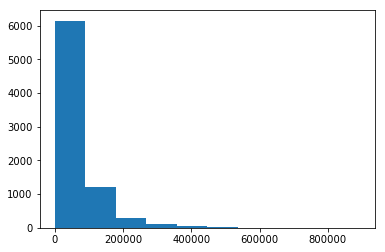

In [10]:
plt.hist(branches['ml2j1'])

In [11]:
#k = events.arrays()


#events.arrays()["lead_jetPhi"]
#events["lead_jetPhi"]
#k

In [12]:
clf = xgb.XGBClassifier()
clf.load_model('vvonly_bdt.xgb')
if len(df) > 0:
    y_pre_prob = clf.predict_proba(df)

In [13]:
y_pre_prob_n = []

In [14]:
if len(df) == 0:
    y_pre_hh = y_pre_prob_n
    y_pre_vv = y_pre_prob_n
elif len(df) > 0:
     y_pre_hh = y_pre_prob[:,1]
     y_pre_vv = y_pre_prob[:,0]

In [15]:
#y_pre_hh = y_pre_prob[:,1]
#y_pre_vv = y_pre_prob[:,0]
#len(y_pre_vv)

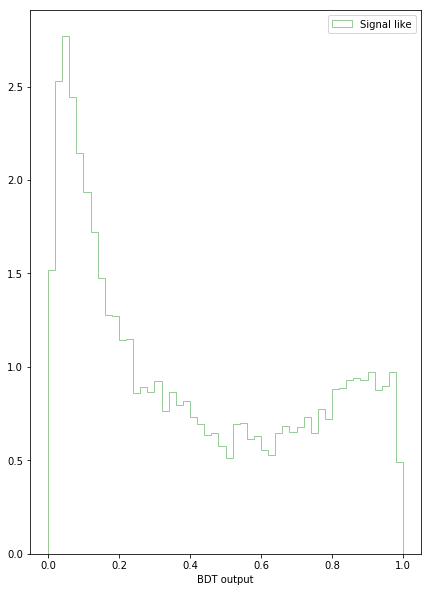

In [16]:
n_bins=50
hist_range=(0.0,1.0)
plt.figure(figsize=(7,10))


plt.hist(y_pre_hh,bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="green",label="Signal like")
#plt.hist(y_pre_vv,bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="red",label="VV like")
#counts,bin_edges = np.histogram(y_pred_prob[:,1],bins=n_bins,range=hist_range,density=True)
#bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, Signal")


#plt.hist(y_pre_vv,bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="blue",label="Train, VV")
#counts,bin_edges = np.histogram(y_pred_prob[:,0],bins=n_bins,range=hist_range,density=True)
#bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, VV")


#plt.hist(y_pred_prob_train[:,0],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="red", label="Train, ttbar")
#counts,bin_edges = np.histogram(y_pred_prob[:,0],bins=n_bins,range=hist_range,density=True)
#bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, ttbar")

plt.legend()
plt.xlabel('BDT output')
plt.show()

In [17]:
y_pre_hh 

array([0.600182  , 0.5581415 , 0.697613  , ..., 0.77336824, 0.69900686,
       0.7152717 ], dtype=float32)

In [18]:
y_pre_vv

array([0.399818  , 0.44185847, 0.30238703, ..., 0.22663173, 0.30099314,
       0.2847283 ], dtype=float32)

In [19]:
dict_type={"vv_bdtscore":"float32",
           "hh_bdtscore":"float32",
           "lep_ID_0":"float32",
           "lep_ID_1":"float32",
           "lep_ID_2":"float32",
           "lep_ID_3":"float32",
           "lep_Pt_0":"float32",
           "lep_Pt_1":"float32",
           "lep_Pt_2":"float32",
           "lep_Pt_3":"float32",
           "lep_E_0":"float32",
           "lep_E_1":"float32",
           "lep_E_2":"float32",
           "lep_E_3":"float32",
           "lep_Eta_0":"float32",
           "lep_Eta_1":"float32",
           "lep_Eta_2":"float32",
           "lep_Eta_3":"float32",
           "lep_Phi_0":"float32",
           "lep_Phi_1":"float32",
           "lep_Phi_2":"float32",
           "lep_Phi_3":"float32",
           "lep_isTightLH_0":"int8",
           "lep_isTightLH_1":"int8",
           "lep_isTightLH_2":"int8",
           "lep_isTightLH_3":"int8",
           "lep_isMediumLH_0":"int8",
           "lep_isMediumLH_1":"int8",
           "lep_isMediumLH_2":"int8",
           "lep_isMediumLH_3":"int8",
           "lep_isLooseLH_0":"int8",
           "lep_isLooseLH_1":"int8",
           "lep_isLooseLH_2":"int8",
           "lep_isLooseLH_3":"int8",
           "lep_isLoose_0":"int8",
           "lep_isLoose_1":"int8",
           "lep_isLoose_2":"int8",
           "lep_isLoose_3":"int8",
           "lep_isTight_0":"int8",
           "lep_isTight_1":"int8",
           "lep_isTight_2":"int8",
           "lep_isTight_3":"int8",
           "lep_isMedium_0":"int8",
           "lep_isMedium_1":"int8",
           "lep_isMedium_2":"int8",
           "lep_isMedium_3":"int8",
           "lep_isolationLoose_0":"int32",
           "lep_isolationLoose_1":"int32",
           "lep_isolationLoose_2":"int32",
           "lep_isolationLoose_3":"int32",
           "lep_isolationGradient_0":"int32",
           "lep_isolationGradient_1":"int32",
           "lep_isolationGradient_2":"int32",
           "lep_isolationGradient_3":"int32",
           "lep_isolationGradientLoose_0":"int32",
           "lep_isolationGradientLoose_1":"int32",
           "lep_isolationGradientLoose_2":"int32",
           "lep_isolationGradientLoose_3":"int32",
           "lep_isolationTightTrackOnly_0":"int32",
           "lep_isolationTightTrackOnly_1":"int32",
           "lep_isolationTightTrackOnly_2":"int32",
           "lep_isolationTightTrackOnly_3":"int32",
           "lep_isolationFCLoose_0":"int8",
           "lep_isolationFCLoose_1":"int8",
           "lep_isolationFCLoose_2":"int8",
           "lep_isolationFCLoose_3":"int8",
           "lep_isolationFCTight_0":"int8",
           "lep_isolationFCTight_1":"int8",
           "lep_isolationFCTight_2":"int8",
           "lep_isolationFCTight_3":"int8",
           "lep_isolationPflowTight_0":"int32",
           "lep_isolationPflowTight_1":"int32",
           "lep_isolationPflowTight_2":"int32",
           "lep_isolationPflowTight_3":"int32",
           "lep_isolationPflowLoose_0":"int32",
           "lep_isolationPflowLoose_1":"int32",
           "lep_isolationPflowLoose_2":"int32",
           "lep_isolationPflowLoose_3":"int32",
           "lep_isPrompt_0":"int8",
           "lep_isPrompt_1":"int8",
           "lep_isPrompt_2":"int8",
           "lep_isPrompt_3":"int8",
           "lep_truthType_0":"int32",
           "lep_truthType_1":"int32",
           "lep_truthType_2":"int32",
           "lep_truthType_3":"int32",
           "lep_truthOrigin_0":"int32",
           "lep_truthOrigin_1":"int32",
           "lep_truthOrigin_2":"int32",
           "lep_truthOrigin_3":"int32",
           "lep_chargeIDBDTLoose_0":"int8",
           "lep_chargeIDBDTLoose_1":"int8",
           "lep_chargeIDBDTLoose_2":"int8",
           "lep_chargeIDBDTLoose_3":"int8",
           "lep_chargeIDBDTResult_0":"int8",
           "lep_chargeIDBDTResult_1":"int8",
           "lep_chargeIDBDTResult_2":"int8",
           "lep_chargeIDBDTResult_3":"int8",
           "tau_pt_0":"float32",
           "tau_pt_1":"float32",
           "tau_eta_0":"float32",
           "tau_eta_1":"float32",
           "tau_charge_0":"float32",
           "tau_charge_1":"float32",
           "tau_width_0":"float32",
           "tau_width_1":"float32",
           "tau_passJetIDRNNLoose_0":"int32",
           "tau_passJetIDRNNLoose_1":"int32",
           "tau_passJetIDRNNMed_0":"int32",
           "tau_passJetIDRNNMed_1":"int32",
           "tau_passEleOLR_0":"int32",
           "tau_passEleOLR_1":"int32",
           "tau_passEleBDT_0":"int32",
           "tau_passEleBDT_1":"int32",
           "tau_passEleBDTMed_0":"int32",
           "tau_passEleBDTMed_1":"int32",
           "tau_passMuonOLR_0":"int32",
           "tau_passMuonOLR_1":"int32",
           "lep_isFakeLep_0":"int8",
           "lep_isFakeLep_1":"int8",
           "lep_isFakeLep_2":"int8",
           "lep_isFakeLep_3":"int8",
           "lep_isTrigMatch_0":"int8",
           "lep_isTrigMatch_1":"int8",
           "lep_isTrigMatch_2":"int8",
           "lep_isTrigMatch_3":"int8",
           "lep_isTrigMatchDLT_0":"int8",
           "lep_isTrigMatchDLT_1":"int8",
           "lep_isTrigMatchDLT_2":"int8",
           "lep_isTrigMatchDLT_3":"int8",
           "lep_ambiguityType_0":"int8",  #uint8
           "lep_ambiguityType_1":"int8",
           "lep_ambiguityType_2":"int8",
           "lep_ambiguityType_3":"int8",  #uint8
           "lep_isQMisID_0":"int8",
           "lep_isQMisID_1":"int8",
           "lep_isQMisID_2":"int8",
           "lep_isQMisID_3":"int8",
           "lep_isConvPh_0":"int8",
           "lep_isConvPh_1":"int8",
           "lep_isConvPh_2":"int8",
           "lep_isConvPh_3":"int8",
           "lep_isExtConvPh_0":"int8",
           "lep_isExtConvPh_1":"int8",
           "lep_isExtConvPh_2":"int8",
           "lep_isExtConvPh_3":"int8",
           "lep_isIntConvPh_0":"int8",
           "lep_isIntConvPh_1":"int8",
           "lep_isIntConvPh_2":"int8",
           "lep_isIntConvPh_3":"int8",
           "lep_isBrems_0":"int8",
           "lep_isBrems_1":"int8",
           "lep_isBrems_2":"int8",
           "lep_isBrems_3":"int8",
           "lep_Mtrktrk_atPV_CO_0":"float32",
           "lep_Mtrktrk_atPV_CO_1":"float32",
           "lep_Mtrktrk_atPV_CO_2":"float32",
           "lep_Mtrktrk_atPV_CO_3":"float32",
           "lep_Mtrktrk_atConvV_CO_0":"float32",
           "lep_Mtrktrk_atConvV_CO_1":"float32",
           "lep_Mtrktrk_atConvV_CO_2":"float32",
           "lep_Mtrktrk_atConvV_CO_3":"float32",
           "lep_RadiusCO_0":"float32",
           "lep_RadiusCO_1":"float32",
           "lep_RadiusCO_2":"float32",
           "lep_RadiusCO_3":"float32",
           "lep_RadiusCOX_0":"float32",
           "lep_RadiusCOX_1":"float32",
           "lep_RadiusCOX_2":"float32",
           "lep_RadiusCOX_3":"float32",
           "lep_RadiusCOY_0":"float32",
           "lep_RadiusCOY_1":"float32",
           "lep_RadiusCOY_2":"float32",
           "lep_RadiusCOY_3":"float32",
           "lep_truthParentPdgId_0":"int32",
           "lep_truthParentPdgId_1":"int32",
           "lep_truthParentPdgId_2":"int32",
           "lep_truthParentPdgId_3":"int32",
           "lep_truthParentOrigin_0":"int32",
           "lep_truthParentOrigin_1":"int32",
           "lep_truthParentOrigin_2":"int32",
           "lep_truthParentOrigin_3":"int32",
           "lep_isISR_FSR_Ph_0":"int8",
           "lep_isISR_FSR_Ph_1":"int8",
           "lep_isISR_FSR_Ph_2":"int8",
           "lep_isISR_FSR_Ph_3":"int8",
           "lep_isTruthMatched_0":"int8",
           "lep_isTruthMatched_1":"int8",
           "lep_isTruthMatched_2":"int8",
           "lep_isTruthMatched_3":"int8",
           "lep_truthParentType_0":"int32",
           "lep_truthParentType_1":"int32",
           "lep_truthParentType_2":"int32",
           "lep_truthParentType_3":"int32",
           "lep_truthPdgId_0":"int32",
           "lep_truthPdgId_1":"int32",
           "lep_truthPdgId_2":"int32",
           "lep_truthPdgId_3":"int32",
           "lep_truthParentStatus_0":"int32",
           "lep_truthParentStatus_1":"int32",
           "lep_truthParentStatus_2":"int32",
           "lep_truthParentStatus_3":"int32",
           "lep_plvWP_Loose_0":"int32",
           "lep_plvWP_Loose_1":"int32",
           "lep_plvWP_Loose_2":"int32",
           "lep_plvWP_Loose_3":"int32",
           "lep_plvWP_Tight_0":"int32",
           "lep_plvWP_Tight_1":"int32",
           "lep_plvWP_Tight_2":"int32",
           "lep_plvWP_Tight_3":"int32",
           "lep_jet_deltaR_0":"float32",
           "lep_jet_deltaR_1":"float32",
           "lep_jet_deltaR_2":"float32",
           "lep_jet_deltaR_3":"float32",
           "RunYear":"int32",
           "weight_mc":"float32",
           "weight_pileup":"float32",
           "weight_jvt":"float32",
           "mc_xSection":"float32",
           "mc_kFactor":"float32",
           "total_leptons":"int32",
           "total_charge":"int32",
           "HLT_mu20_iloose_L1MU15":"int8",
           "HLT_mu50":"int8",
           "HLT_mu26_ivarmedium":"int8",
           "HLT_mu22_mu8noL1":"int8",
           "HLT_e60_lhmedium_nod0":"int8",
           "HLT_mu18_mu8noL1":"int8",
           "HLT_e26_lhtight_nod0_ivarloose":"int8",
           "HLT_e24_lhmedium_L1EM20VH":"int8",
           "HLT_e17_lhloose_nod0_mu14":"int8",
           "HLT_2e12_lhloose_L12EM10VH":"int8",
           "HLT_e120_lhloose":"int8",
           "HLT_2e24_lhvloose_nod0":"int8",
           "HLT_e140_lhloose_nod0":"int8",
           "HLT_e60_lhmedium":"int8",
           "HLT_2e17_lhvloose_nod0":"int8",
           "HLT_e17_lhloose_mu14":"int8",
           "met_met":"float32",
           "met_phi":"float32",
           "loose":"int32",
           "Mll01":"float32",
           "Mll02":"float32",
           "Mll12":"float32",
           "Mlll012":"float32",
           "Ptll01":"float32",
           "Ptll02":"float32",
           "Ptll12":"float32",
           "DRll01":"float32",
           "DRll02":"float32",
           "DRll12":"float32",
           "best_Z_Mll":"float32",
           "best_Z_other_Mll":"float32",
           "best_Z_other_MtLepMet":"float32",
           "minOSSFMll":"float32",
           "minOSMll":"float32",
           "nJets_OR":"int32",
           "nJets_OR_DL1_85":"int32",
           "nJets_OR_DL1_77":"int32",
           "nJets_OR_DL1_70":"int32",
           "nJets_OR_DL1r_85":"int32",
           "nJets_OR_DL1r_77":"int32",
           "nJets_OR_DL1r_70":"int32",
           "nTaus_OR_Pt25":"int32",
           "nTaus_OR_Pt25_RNN":"int32",
           "isBlinded":"int8",
           "HT":"float32",
           "HT_lep":"float32",
           "HT_jets":"float32",
           "lead_jetPt":"float32",
           "lead_jetEta":"float32",
           "lead_jetPhi":"float32",
           "lead_jetE":"float32",
           "sublead_jetPt":"float32",
           "sublead_jetEta":"float32",
           "sublead_jetPhi":"float32",
           "sublead_jetE":"float32",
           "onelep_type":"int32",
           "dilep_type":"int32",
           "trilep_type":"int32",
           "quadlep_type":"int32",
           "higgs1Mode":"int32",
           "higgs2Mode":"int32",
           "eventNumber":"int64",   ###uint64
           "runNumber":"int32",     ##uint32
           "mcChannelNumber":"int32",  #uint32
           "totalEventsWeighted":"float32",
           "DRl0jmin":"float32",
           "DRl1jmin":"float32",
           "DRl0j0":"float32",
           "DRl0j1":"float32",
           "DRl1j0":"float32",
           "DRl1j1":"float32",
           "DRl2j0":"float32",
           "DRl2j1":"float32",
           "DRj0j1":"float32",
           "DRjjMax":"float32",
           "mj0j1":"float32",
           "ml0j0":"float32",
           "ml0j1":"float32",
           "ml1j0":"float32",
           "ml1j1":"float32",
           "ml2j0":"float32",
           "ml2j1":"float32",
           "isQMisIDEvent":"int8",
           "isFakeEvent":"int8",
           "isLepFromPhEvent":"int8"}

In [20]:
dict_val={"vv_bdtscore":y_pre_vv,
          "hh_bdtscore":y_pre_hh,
          "lep_ID_0":lep_ID_0,
          "lep_ID_1":lep_ID_1,
          "lep_ID_2":lep_ID_2,
          "lep_ID_3":lep_ID_3,
          "lep_Pt_0":lep_Pt_0,
          "lep_Pt_1":lep_Pt_1,
          "lep_Pt_2":lep_Pt_2,
          "lep_Pt_3":lep_Pt_3,
          "lep_E_0":lep_E_0,
          "lep_E_1":lep_E_1,
          "lep_E_2":lep_E_2,
          "lep_E_3":lep_E_3,
          "lep_Eta_0":lep_Eta_0,
          "lep_Eta_1":lep_Eta_1,
          "lep_Eta_2":lep_Eta_2,
          "lep_Eta_3":lep_Eta_3,
          "lep_Phi_0":lep_Phi_0,
          "lep_Phi_1":lep_Phi_1,
          "lep_Phi_2":lep_Phi_2,
          "lep_Phi_3":lep_Phi_3,
          "lep_isTightLH_0":lep_isTightLH_0,
          "lep_isTightLH_1":lep_isTightLH_1,
          "lep_isTightLH_2":lep_isTightLH_2,
          "lep_isTightLH_3":lep_isTightLH_3,
          "lep_isMediumLH_0":lep_isMediumLH_0,
          "lep_isMediumLH_1":lep_isMediumLH_1,
          "lep_isMediumLH_2":lep_isMediumLH_2,
          "lep_isMediumLH_3":lep_isMediumLH_3,
          "lep_isLooseLH_0":lep_isLooseLH_0,
          "lep_isLooseLH_1":lep_isLooseLH_1,
          "lep_isLooseLH_2":lep_isLooseLH_2,
          "lep_isLooseLH_3":lep_isLooseLH_3,
          "lep_isLoose_0":lep_isLoose_0,
          "lep_isLoose_1":lep_isLoose_1,
          "lep_isLoose_2":lep_isLoose_2,
          "lep_isLoose_3":lep_isLoose_3,
          "lep_isTight_0":lep_isTight_0,
          "lep_isTight_1":lep_isTight_1,
          "lep_isTight_2":lep_isTight_2,
          "lep_isTight_3":lep_isTight_3,
          "lep_isMedium_0":lep_isMedium_0,
          "lep_isMedium_1":lep_isMedium_1,
          "lep_isMedium_2":lep_isMedium_2,
          "lep_isMedium_3":lep_isMedium_3,
          "lep_isolationLoose_0":lep_isolationLoose_0,
          "lep_isolationLoose_1":lep_isolationLoose_1,
          "lep_isolationLoose_2":lep_isolationLoose_2,
          "lep_isolationLoose_3":lep_isolationLoose_3,
          "lep_isolationGradient_0":lep_isolationGradient_0,
          "lep_isolationGradient_1":lep_isolationGradient_1,
          "lep_isolationGradient_2":lep_isolationGradient_2,
          "lep_isolationGradient_3":lep_isolationGradient_3,
          "lep_isolationGradientLoose_0":lep_isolationGradientLoose_0,
          "lep_isolationGradientLoose_1":lep_isolationGradientLoose_1,
          "lep_isolationGradientLoose_2":lep_isolationGradientLoose_2,
          "lep_isolationGradientLoose_3":lep_isolationGradientLoose_3,
          "lep_isolationTightTrackOnly_0":lep_isolationTightTrackOnly_0,
          "lep_isolationTightTrackOnly_1":lep_isolationTightTrackOnly_1,
          "lep_isolationTightTrackOnly_2":lep_isolationTightTrackOnly_2,
          "lep_isolationTightTrackOnly_3":lep_isolationTightTrackOnly_3,
          "lep_isolationFCLoose_0":lep_isolationFCLoose_0,
          "lep_isolationFCLoose_1":lep_isolationFCLoose_1,
          "lep_isolationFCLoose_2":lep_isolationFCLoose_2,
          "lep_isolationFCLoose_3":lep_isolationFCLoose_3,
          "lep_isolationFCTight_0":lep_isolationFCTight_0,
          "lep_isolationFCTight_1":lep_isolationFCTight_1,
          "lep_isolationFCTight_2":lep_isolationFCTight_2,
          "lep_isolationFCTight_3":lep_isolationFCTight_3,
          "lep_isolationPflowTight_0":lep_isolationPflowTight_0,
          "lep_isolationPflowTight_1":lep_isolationPflowTight_1,
          "lep_isolationPflowTight_2":lep_isolationPflowTight_2,
          "lep_isolationPflowTight_3":lep_isolationPflowTight_3,
          "lep_isolationPflowLoose_0":lep_isolationPflowLoose_0,
          "lep_isolationPflowLoose_1":lep_isolationPflowLoose_1,
          "lep_isolationPflowLoose_2":lep_isolationPflowLoose_2,
          "lep_isolationPflowLoose_3":lep_isolationPflowLoose_3,
          "lep_isPrompt_0":lep_isPrompt_0,
          "lep_isPrompt_1":lep_isPrompt_1,
          "lep_isPrompt_2":lep_isPrompt_2,
          "lep_isPrompt_3":lep_isPrompt_3,
          "lep_truthType_0":lep_truthType_0,
          "lep_truthType_1":lep_truthType_1,
          "lep_truthType_2":lep_truthType_2,
          "lep_truthType_3":lep_truthType_3,
          "lep_truthOrigin_0":lep_truthOrigin_0,
          "lep_truthOrigin_1":lep_truthOrigin_1,
          "lep_truthOrigin_2":lep_truthOrigin_2,
          "lep_truthOrigin_3":lep_truthOrigin_3,
          "lep_chargeIDBDTLoose_0":lep_chargeIDBDTLoose_0,
          "lep_chargeIDBDTLoose_1":lep_chargeIDBDTLoose_1,
          "lep_chargeIDBDTLoose_2":lep_chargeIDBDTLoose_2,
          "lep_chargeIDBDTLoose_3":lep_chargeIDBDTLoose_3,
          "lep_chargeIDBDTResult_0":lep_chargeIDBDTResult_0,
          "lep_chargeIDBDTResult_1":lep_chargeIDBDTResult_1,
          "lep_chargeIDBDTResult_2":lep_chargeIDBDTResult_2,
          "lep_chargeIDBDTResult_3":lep_chargeIDBDTResult_3,
          "tau_pt_0":tau_pt_0,
          "tau_pt_1":tau_pt_1,
          "tau_eta_0":tau_eta_0,
          "tau_eta_1":tau_eta_1,
          "tau_charge_0":tau_charge_0,
          "tau_charge_1":tau_charge_1,
          "tau_width_0":tau_width_0,
          "tau_width_1":tau_width_1,
          "tau_passJetIDRNNLoose_0":tau_passJetIDRNNLoose_0,
          "tau_passJetIDRNNLoose_1":tau_passJetIDRNNLoose_1,
          "tau_passJetIDRNNMed_0":tau_passJetIDRNNMed_0,
          "tau_passJetIDRNNMed_1":tau_passJetIDRNNMed_1,
          "tau_passEleOLR_0":tau_passEleOLR_0,
          "tau_passEleOLR_1":tau_passEleOLR_1,
          "tau_passEleBDT_0":tau_passEleBDT_0,
          "tau_passEleBDT_1":tau_passEleBDT_1,
          "tau_passEleBDTMed_0":tau_passEleBDTMed_0,
          "tau_passEleBDTMed_1":tau_passEleBDTMed_1,
          "tau_passMuonOLR_0":tau_passMuonOLR_0,
          "tau_passMuonOLR_1":tau_passMuonOLR_1,
          "lep_isFakeLep_0":lep_isFakeLep_0,
          "lep_isFakeLep_1":lep_isFakeLep_1,
          "lep_isFakeLep_2":lep_isFakeLep_2,
          "lep_isFakeLep_3":lep_isFakeLep_3,
          "lep_isTrigMatch_0":lep_isTrigMatch_0,
          "lep_isTrigMatch_1":lep_isTrigMatch_1,
          "lep_isTrigMatch_2":lep_isTrigMatch_2,
          "lep_isTrigMatch_3":lep_isTrigMatch_3,
          "lep_isTrigMatchDLT_0":lep_isTrigMatchDLT_0,
          "lep_isTrigMatchDLT_1":lep_isTrigMatchDLT_1,
          "lep_isTrigMatchDLT_2":lep_isTrigMatchDLT_2,
          "lep_isTrigMatchDLT_3":lep_isTrigMatchDLT_3,
          "lep_ambiguityType_0":lep_ambiguityType_0,
          "lep_ambiguityType_1":lep_ambiguityType_1,
          "lep_ambiguityType_2":lep_ambiguityType_2,
          "lep_ambiguityType_3":lep_ambiguityType_3,
          "lep_isQMisID_0":lep_isQMisID_0,
          "lep_isQMisID_1":lep_isQMisID_1,
          "lep_isQMisID_2":lep_isQMisID_2,
          "lep_isQMisID_3":lep_isQMisID_3,
          "lep_isConvPh_0":lep_isConvPh_0,
          "lep_isConvPh_1":lep_isConvPh_1,
          "lep_isConvPh_2":lep_isConvPh_2,
          "lep_isConvPh_3":lep_isConvPh_3,
          "lep_isExtConvPh_0":lep_isExtConvPh_0,
          "lep_isExtConvPh_1":lep_isExtConvPh_1,
          "lep_isExtConvPh_2":lep_isExtConvPh_2,
          "lep_isExtConvPh_3":lep_isExtConvPh_3,
          "lep_isIntConvPh_0":lep_isIntConvPh_0,
          "lep_isIntConvPh_1":lep_isIntConvPh_1,
          "lep_isIntConvPh_2":lep_isIntConvPh_2,
          "lep_isIntConvPh_3":lep_isIntConvPh_3,
          "lep_isBrems_0":lep_isBrems_0,
          "lep_isBrems_1":lep_isBrems_1,
          "lep_isBrems_2":lep_isBrems_2,
          "lep_isBrems_3":lep_isBrems_3,
          "lep_Mtrktrk_atPV_CO_0":lep_Mtrktrk_atPV_CO_0,
          "lep_Mtrktrk_atPV_CO_1":lep_Mtrktrk_atPV_CO_1,
          "lep_Mtrktrk_atPV_CO_2":lep_Mtrktrk_atPV_CO_2,
          "lep_Mtrktrk_atPV_CO_3":lep_Mtrktrk_atPV_CO_3,
          "lep_Mtrktrk_atConvV_CO_0":lep_Mtrktrk_atConvV_CO_0,
          "lep_Mtrktrk_atConvV_CO_1":lep_Mtrktrk_atConvV_CO_1,
          "lep_Mtrktrk_atConvV_CO_2":lep_Mtrktrk_atConvV_CO_2,
          "lep_Mtrktrk_atConvV_CO_3":lep_Mtrktrk_atConvV_CO_3,
          "lep_RadiusCO_0":lep_RadiusCO_0,
          "lep_RadiusCO_1":lep_RadiusCO_1,
          "lep_RadiusCO_2":lep_RadiusCO_2,
          "lep_RadiusCO_3":lep_RadiusCO_3,
          "lep_RadiusCOX_0":lep_RadiusCOX_0,
          "lep_RadiusCOX_1":lep_RadiusCOX_1,
          "lep_RadiusCOX_2":lep_RadiusCOX_2,
          "lep_RadiusCOX_3":lep_RadiusCOX_3,
          "lep_RadiusCOY_0":lep_RadiusCOY_0,
          "lep_RadiusCOY_1":lep_RadiusCOY_1,
          "lep_RadiusCOY_2":lep_RadiusCOY_2,
          "lep_RadiusCOY_3":lep_RadiusCOY_3,
          "lep_truthParentPdgId_0":lep_truthParentPdgId_0,
          "lep_truthParentPdgId_1":lep_truthParentPdgId_1,
          "lep_truthParentPdgId_2":lep_truthParentPdgId_2,
          "lep_truthParentPdgId_3":lep_truthParentPdgId_3,
          "lep_truthParentOrigin_0":lep_truthParentOrigin_0,
          "lep_truthParentOrigin_1":lep_truthParentOrigin_1,
          "lep_truthParentOrigin_2":lep_truthParentOrigin_2,
          "lep_truthParentOrigin_3":lep_truthParentOrigin_3,
          "lep_isISR_FSR_Ph_0":lep_isISR_FSR_Ph_0,
          "lep_isISR_FSR_Ph_1":lep_isISR_FSR_Ph_1,
          "lep_isISR_FSR_Ph_2":lep_isISR_FSR_Ph_2,
          "lep_isISR_FSR_Ph_3":lep_isISR_FSR_Ph_3,
          "lep_isTruthMatched_0":lep_isTruthMatched_0,
          "lep_isTruthMatched_1":lep_isTruthMatched_1,
          "lep_isTruthMatched_2":lep_isTruthMatched_2,
          "lep_isTruthMatched_3":lep_isTruthMatched_3,
          "lep_truthParentType_0":lep_truthParentType_0,
          "lep_truthParentType_1":lep_truthParentType_1,
          "lep_truthParentType_2":lep_truthParentType_2,
          "lep_truthParentType_3":lep_truthParentType_3,
          "lep_truthPdgId_0":lep_truthPdgId_0,
          "lep_truthPdgId_1":lep_truthPdgId_1,
          "lep_truthPdgId_2":lep_truthPdgId_2,
          "lep_truthPdgId_3":lep_truthPdgId_3,
          "lep_truthParentStatus_0":lep_truthParentStatus_0,
          "lep_truthParentStatus_1":lep_truthParentStatus_1,
          "lep_truthParentStatus_2":lep_truthParentStatus_2,
          "lep_truthParentStatus_3":lep_truthParentStatus_3,
          "lep_plvWP_Loose_0":lep_plvWP_Loose_0,
          "lep_plvWP_Loose_1":lep_plvWP_Loose_1,
          "lep_plvWP_Loose_2":lep_plvWP_Loose_2,
          "lep_plvWP_Loose_3":lep_plvWP_Loose_3,
          "lep_plvWP_Tight_0":lep_plvWP_Tight_0,
          "lep_plvWP_Tight_1":lep_plvWP_Tight_1,
          "lep_plvWP_Tight_2":lep_plvWP_Tight_2,
          "lep_plvWP_Tight_3":lep_plvWP_Tight_3,
          "lep_jet_deltaR_0":lep_jet_deltaR_0,
          "lep_jet_deltaR_1":lep_jet_deltaR_1,
          "lep_jet_deltaR_2":lep_jet_deltaR_2,
          "lep_jet_deltaR_3":lep_jet_deltaR_3,
          "RunYear":RunYear,
          "weight_mc":weight_mc,
          "weight_pileup":weight_pileup,
          "weight_jvt":weight_jvt,
          "mc_xSection":mc_xSection,
          "mc_kFactor":mc_kFactor,
          "total_leptons":total_leptons,
          "total_charge":total_charge,
          "HLT_mu20_iloose_L1MU15":HLT_mu20_iloose_L1MU15,
          "HLT_mu50":HLT_mu50,
          "HLT_mu26_ivarmedium":HLT_mu26_ivarmedium,
          "HLT_mu22_mu8noL1":HLT_mu22_mu8noL1,
          "HLT_e60_lhmedium_nod0":HLT_e60_lhmedium_nod0,
          "HLT_mu18_mu8noL1":HLT_mu18_mu8noL1,
          "HLT_e26_lhtight_nod0_ivarloose":HLT_e26_lhtight_nod0_ivarloose,
          "HLT_e24_lhmedium_L1EM20VH":HLT_e24_lhmedium_L1EM20VH,
          "HLT_e17_lhloose_nod0_mu14":HLT_e17_lhloose_nod0_mu14,
          "HLT_2e12_lhloose_L12EM10VH":HLT_2e12_lhloose_L12EM10VH,
          "HLT_e120_lhloose":HLT_e120_lhloose,
          "HLT_2e24_lhvloose_nod0":HLT_2e24_lhvloose_nod0,
          "HLT_e140_lhloose_nod0":HLT_e140_lhloose_nod0,
          "HLT_e60_lhmedium":HLT_e60_lhmedium,
          "HLT_2e17_lhvloose_nod0":HLT_2e17_lhvloose_nod0,
          "HLT_e17_lhloose_mu14":HLT_e17_lhloose_mu14,
          "met_met":met_met,
          "met_phi":met_phi,
          "loose":loose,
          "Mll01":Mll01,
          "Mll02":Mll02,
          "Mll12":Mll12,
          "Mlll012":Mlll012,
          "Ptll01":Ptll01,
          "Ptll02":Ptll02,
          "Ptll12":Ptll12,
          "DRll01":DRll01,
          "DRll02":DRll02,
          "DRll12":DRll12,
          "best_Z_Mll":best_Z_Mll,
          "best_Z_other_Mll":best_Z_other_Mll,
          "best_Z_other_MtLepMet":best_Z_other_MtLepMet,
          "minOSSFMll":minOSSFMll,
          "minOSMll":minOSMll,
          "nJets_OR":nJets_OR,
          "nJets_OR_DL1_85":nJets_OR_DL1_85,
          "nJets_OR_DL1_77":nJets_OR_DL1_77,
          "nJets_OR_DL1_70":nJets_OR_DL1_70,
          "nJets_OR_DL1r_85":nJets_OR_DL1r_85,
          "nJets_OR_DL1r_77":nJets_OR_DL1r_77,
          "nJets_OR_DL1r_70":nJets_OR_DL1r_70,
          "nTaus_OR_Pt25":nTaus_OR_Pt25,
          "nTaus_OR_Pt25_RNN":nTaus_OR_Pt25_RNN,
          "isBlinded":isBlinded,
          "HT":HT,
          "HT_lep":HT_lep,
          "HT_jets":HT_jets,
          "lead_jetPt":lead_jetPt,
          "lead_jetEta":lead_jetEta,
          "lead_jetPhi":lead_jetPhi,
          "lead_jetE":lead_jetE,
          "sublead_jetPt":sublead_jetPt,
          "sublead_jetEta":sublead_jetEta,
          "sublead_jetPhi":sublead_jetPhi,
          "sublead_jetE":sublead_jetE,
          "onelep_type":onelep_type,
          "dilep_type":dilep_type,
          "trilep_type":trilep_type,
          "quadlep_type":quadlep_type,
          "higgs1Mode":higgs1Mode,
          "higgs2Mode":higgs2Mode,
          "eventNumber":eventNumber,
          "runNumber":runNumber,
          "mcChannelNumber":mcChannelNumber,
          "totalEventsWeighted":totalEventsWeighted,
          "DRl0jmin":DRl0jmin,
          "DRl1jmin":DRl1jmin,
          "DRl0j0":DRl0j0,
          "DRl0j1":DRl0j1,
          "DRl1j0":DRl1j0,
          "DRl1j1":DRl1j1,
          "DRl2j0":DRl2j0,
          "DRl2j1":DRl2j1,
          "DRj0j1":DRj0j1,
          "DRjjMax":DRjjMax,
          "mj0j1":mj0j1,
          "ml0j0":ml0j0,
          "ml0j1":ml0j1,
          "ml1j0":ml1j0,
          "ml1j1":ml1j1,
          "ml2j0":ml2j0,
          "ml2j1":ml2j1,
          "isQMisIDEvent":isQMisIDEvent,
          "isFakeEvent":isFakeEvent,
          "isLepFromPhEvent":isLepFromPhEvent}

In [21]:
with up.recreate("ttbar_xbdt.root") as f:
    f['nominal'] = up.newtree(dict_type)
    f['nominal'].extend(dict_val)